Нужно решить задачу классификации наличия болезни сердца у пациентов. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно.


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Подготовим датасет к обучению моделей.
Категориальные переменные переведите в цифровые значения.

In [4]:
df.info() # havent got null obects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [7]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

col = ['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in col:
  df[column] = lab_enc.fit_transform(df[column])

In [8]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Построим 1-2 графика на выбор.

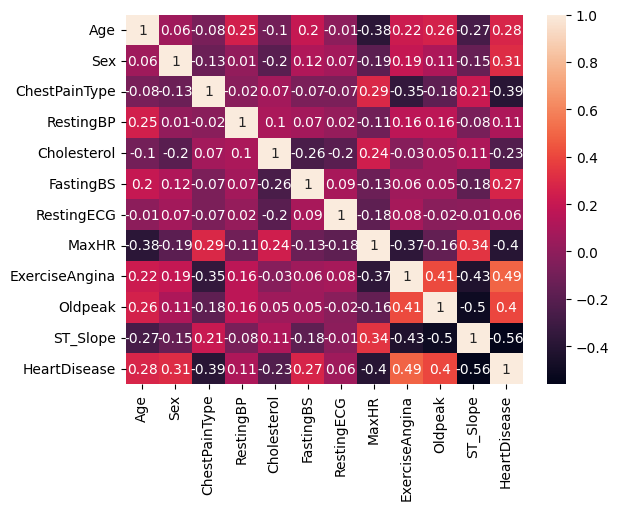

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr =df.corr().round(decimals=2)

sns.heatmap(corr, annot = True)
plt.show()
# we see that the most correlation between target wariable with othes are ChestPainType, ExersizeAngina and st_slope

<ipython-input-10-43a8c15dcbaa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Cholesterol, bins =100)


<Axes: xlabel='Cholesterol', ylabel='Density'>

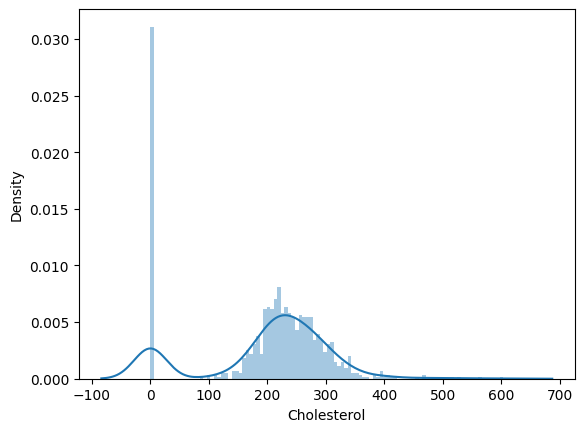

In [10]:
sns.distplot(df.Cholesterol, bins =100)

In [11]:
df[df.Cholesterol ==0].replace(to_replace= 0)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,1,0,115,0,0,1,93,1,0.0,1,1
294,32,1,3,95,0,1,1,127,1,0.7,2,1
295,61,1,3,105,0,1,1,110,1,1.5,2,1
296,50,1,3,145,0,1,1,139,1,0.7,1,1
297,57,1,3,110,0,1,2,131,1,1.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,1,3,122,0,1,1,120,1,0.5,2,1
515,63,1,2,130,0,1,2,160,1,3.0,1,1
518,48,1,2,102,0,1,2,110,1,1.0,1,1
535,56,1,2,130,0,1,2,122,1,1.0,1,1


In [12]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [14]:
import numpy as np
df.Cholesterol.replace(0, np.NaN, inplace =True)
df.Cholesterol.replace(np.nan, df.Cholesterol.mean(), inplace = True)



<ipython-input-15-43a8c15dcbaa>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Cholesterol, bins =100)


<Axes: xlabel='Cholesterol', ylabel='Density'>

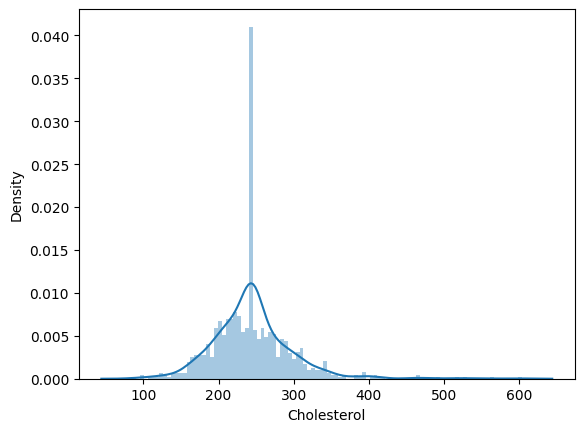

In [15]:
sns.distplot(df.Cholesterol, bins =100)

<ipython-input-16-ea53b85163e8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Oldpeak)


<Axes: xlabel='Oldpeak', ylabel='Density'>

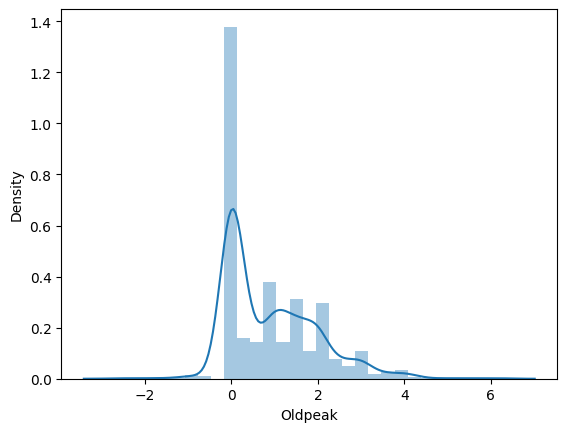

In [16]:
sns.distplot(df.Oldpeak)

In [17]:
df.Oldpeak[df.Oldpeak <0].count()

13


3.Разделим выборку на обучающее и тестовое подмножество

In [18]:
col = df.columns.tolist()

In [19]:
X = df[col[:-1]]

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 79.0 KB


In [21]:
y = df.HeartDisease

In [22]:
score =[]

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state= 7)

Обучим дерево решений на обучающем множестве.

In [24]:
# tree.DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =3)

In [25]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [26]:
score.append(f'DecisionTreeClassifier_ score (train/test) {[dtc.score(X_train,y_train), dtc.score(X_test, y_test)]}')
[dtc.score(X_train,y_train), dtc.score(X_test, y_test)]

[0.8514986376021798, 0.842391304347826]

In [27]:
y_pred = dtc.predict(X_test)

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_true =y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        90
           1       0.86      0.83      0.84        94

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [29]:
# Выявляем наиболее важные признаки и выводим на график.
imp = pd.Series(dtc.feature_importances_)
imp.index =pd.Series(X_test.columns)
imp = imp.sort_values(ascending = False)
imp

ST_Slope          0.662735
ChestPainType     0.208011
Oldpeak           0.075794
MaxHR             0.037603
Sex               0.015858
Age               0.000000
RestingBP         0.000000
Cholesterol       0.000000
FastingBS         0.000000
RestingECG        0.000000
ExerciseAngina    0.000000
dtype: float64

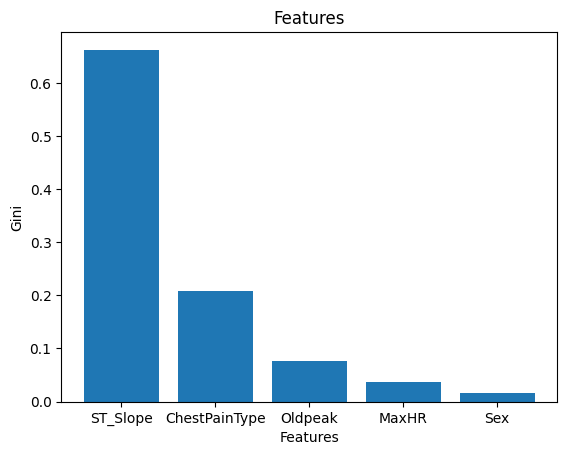

In [30]:
import matplotlib.pyplot as plt

plt.title('Features')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [31]:
#ensemble.RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth =3, n_estimators=100)

In [32]:
rfc.fit(X_train, y_train)
score.append(f'RandomForestClassifier_ score (train/test) {[rfc.score(X_train,y_train), rfc.score(X_test, y_test)]}')
[rfc.score(X_train,y_train), rfc.score(X_test, y_test)]

[0.8651226158038147, 0.8586956521739131]

In [33]:
y_pred = rfc.predict(X_test)

In [34]:
report = classification_report(y_true =y_test, y_pred = y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        90
           1       0.84      0.89      0.87        94

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [35]:
# Выявляем наиболее важные признаки и выводим на график.
imp = pd.Series(rfc.feature_importances_)
imp.index =pd.Series(X_test.columns)
imp = imp.sort_values(ascending = False)
imp

ST_Slope          0.330999
ChestPainType     0.239978
ExerciseAngina    0.138648
Oldpeak           0.119799
MaxHR             0.080359
Age               0.021739
Sex               0.019212
FastingBS         0.018541
Cholesterol       0.017776
RestingBP         0.009367
RestingECG        0.003580
dtype: float64

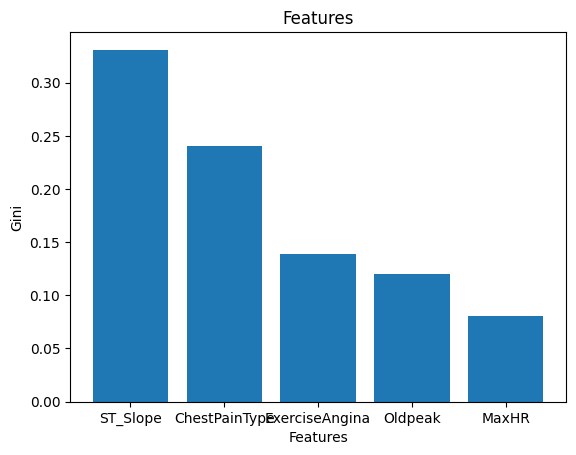

In [36]:
plt.title('Features')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head(5).index, imp.head(5))
plt.show()

7.Обучите бэггинг над моделью из п. 4a.(tree.DecisionTreeClassifier) Используйте ensemble.BaggingClassifier.





In [37]:
from sklearn.ensemble import  BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [38]:
bagging = BaggingRegressor(dtc,
                           n_estimators=30, #кол-во выборок
                           max_samples=0.5, # доля точек в выборке
                           max_features=0.5, # доля признаков на выборке
                           random_state=10)
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeClassifier(max_depth=3),
                 max_features=0.5, max_samples=0.5, n_estimators=30,
                 random_state=10)

In [39]:
y_pred = bagging.predict(X_test)

In [40]:
score.append(f'bagging_ score (train/test) { [bagging.score(X_train,y_train), bagging.score(X_test, y_test)]}')
[bagging.score(X_train,y_train), bagging.score(X_test, y_test)]

[0.6042265499194847, 0.5833296558970317]

8.Обучите стекинг трех моделей из п. 4a (tree.DecisionTreeClassifier), п. 4b (ensemble.RandomForestClassifier) и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5


In [41]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [42]:
Regressor  = StackingRegressor([
    ('DecisionTreeClassifier', DecisionTreeRegressor(max_depth =3)),
    ('RandomForestClassifier', RandomForestRegressor(max_depth =3, n_estimators=100)),
    ('LinearSVC', LinearRegression())],
                  RidgeCV())

In [43]:
Regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('DecisionTreeClassifier',
                               DecisionTreeRegressor(max_depth=3)),
                              ('RandomForestClassifier',
                               RandomForestRegressor(max_depth=3)),
                              ('LinearSVC', LinearRegression())],
                  final_estimator=RidgeCV())

In [44]:
y_pred = Regressor.predict(X_test)
score.append(f'stacking_ score (train/test) with lin_reg { [Regressor.score(X_train,y_train), Regressor.score(X_test, y_test)]}')
[Regressor.score(X_train,y_train), Regressor.score(X_test, y_test)]

[0.5853250610231586, 0.5623643202940767]

In [45]:
Regressor  = StackingRegressor([
    ('DecisionTreeClassifier', DecisionTreeRegressor(max_depth =3)),
    ('RandomForestClassifier', RandomForestRegressor(max_depth =3, n_estimators=100)),
   ],
                  RidgeCV())
Regressor.fit(X_train, y_train)
y_pred = Regressor.predict(X_test)
score.append(f'stacking_ score (train/test) without lin_reg { [Regressor.score(X_train,y_train), Regressor.score(X_test, y_test)]}')
[Regressor.score(X_train,y_train), Regressor.score(X_test, y_test)]

[0.5895391838565098, 0.5587998340697409]

9.Сформулируйте выводы по проделанной работе. a) Сравните метрики построенных моделей. b) Напишите свое мнение, какая модель наилучшая и почему.

In [46]:
score

['DecisionTreeClassifier_ score (train/test) [0.8514986376021798, 0.842391304347826]',
 'RandomForestClassifier_ score (train/test) [0.8651226158038147, 0.8586956521739131]',
 'bagging_ score (train/test) [0.6042265499194847, 0.5833296558970317]',
 'stacking_ score (train/test) with lin_reg [0.5853250610231586, 0.5623643202940767]',
 'stacking_ score (train/test) without lin_reg [0.5895391838565098, 0.5587998340697409]']

In [47]:
# Рандомный лес и древо решений дают наилучший результат.
# бэггинг и стэкинг вопреки ожиданиям снижают точность моделей.
